<a href="https://colab.research.google.com/github/DaiVo20/Stock-Price-Prediction/blob/main/Seasonal%20Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt  
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima.utils import ndiffs

In [2]:
df=pd.read_csv('/content/stock_data.csv',index_col='Date',parse_dates=True)

In [62]:
df.tail()

,Open,High,Low,Close,Volume,OpenInt,Stock
Date,,,,,,,
2017-11-06,178.56,180.450,178.310,180.17,13275578,0,FB
2017-11-07,180.50,180.748,179.403,180.25,12903836,0,FB
2017-11-08,179.79,180.350,179.110,179.56,10467606,0,FB
2017-11-09,178.31,179.400,177.090,179.30,12602188,0,FB
2017-11-10,178.35,179.100,177.960,178.46,11060355,0,FB


In [4]:
companies = df['Stock'].unique()
stock ={}
for i in companies:
  stock[i] = df[df['Stock'] == i]['Close']

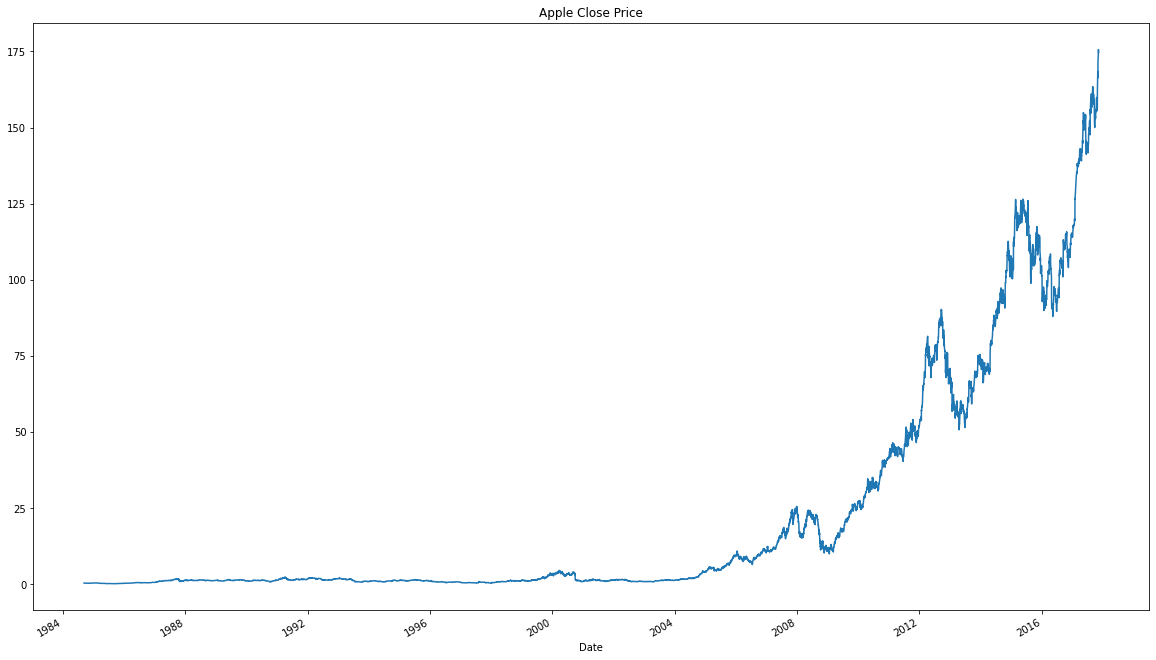

In [5]:
stock['AAPL'].plot(figsize=(20, 12), title="Apple Close Price")

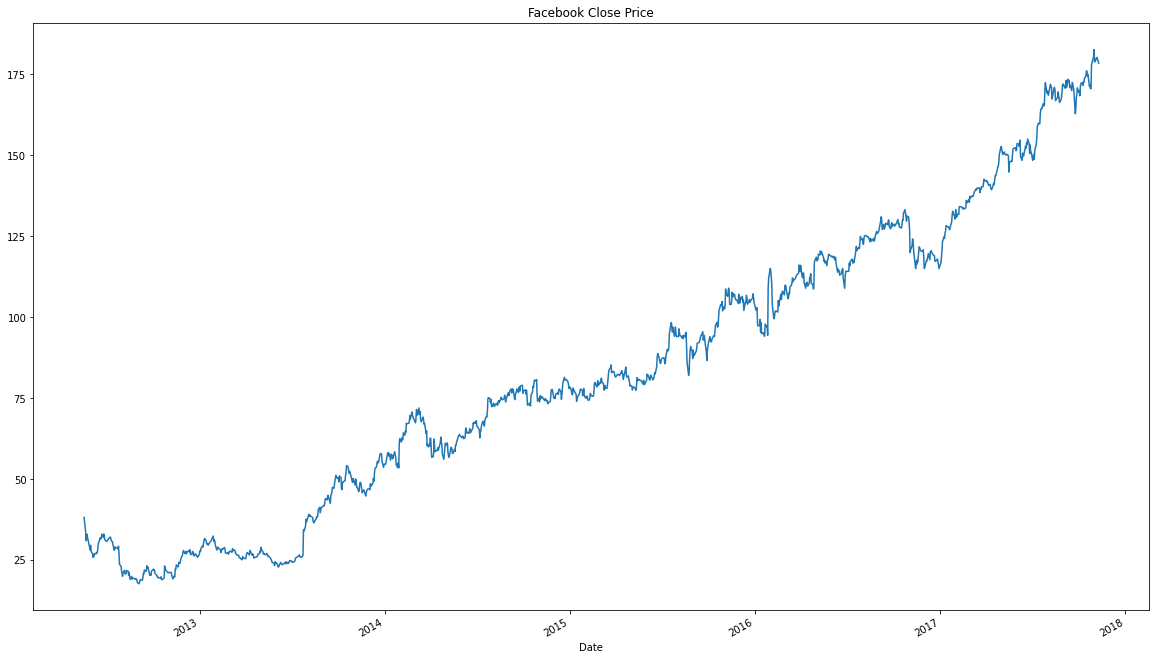

In [6]:
stock['FB'].plot(figsize=(20, 12), title="Facebook Close Price")

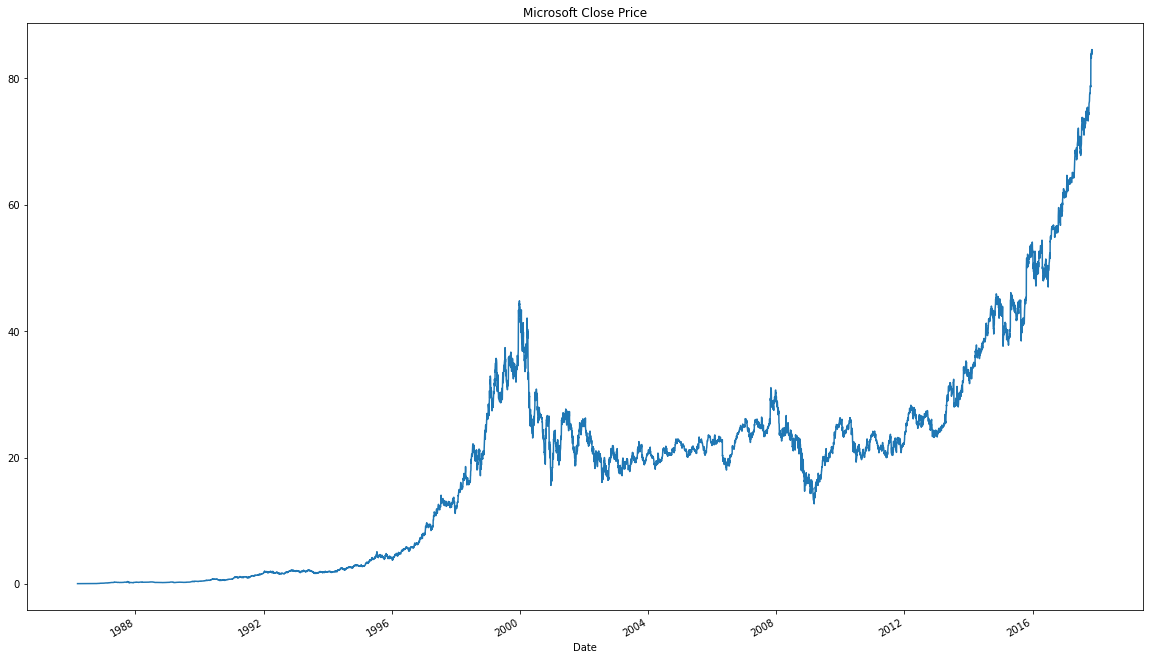

In [7]:
stock['MSFT'].plot(figsize=(20, 12),title="Microsoft Close Price")

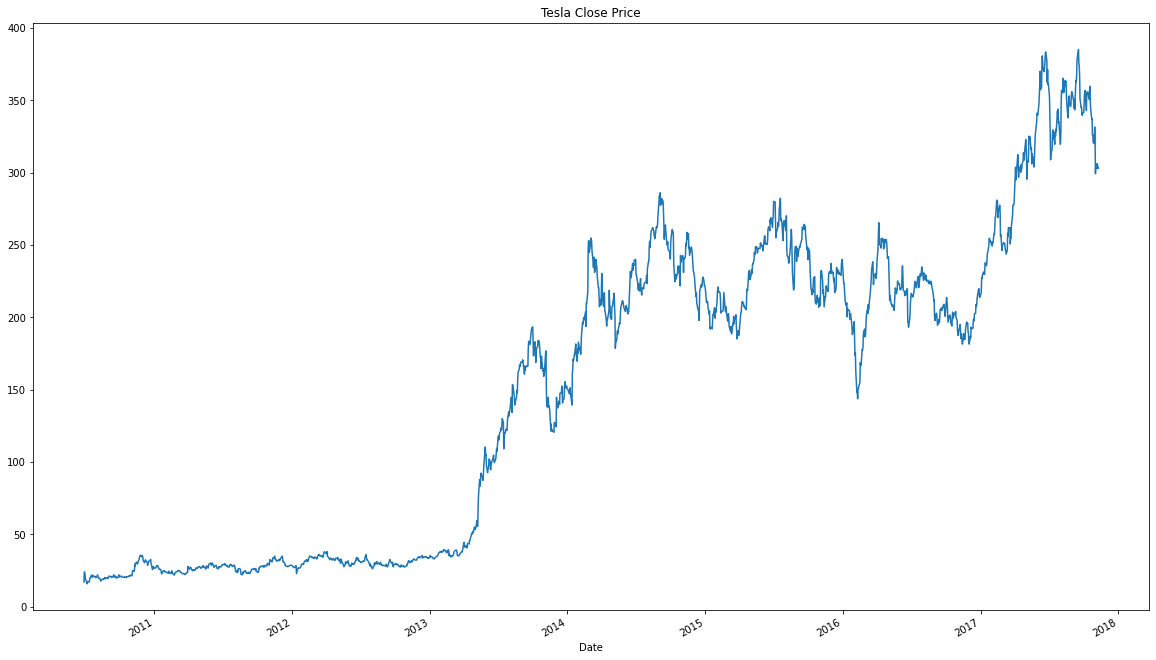

In [8]:
stock['TSLA'].plot(figsize=(20, 12),title="Tesla Close Price")

In [9]:
#Checking For Stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [10]:
def SplitData(data):#80-20
  train=data.iloc[:-int(len(data)*0.2)]
  test=data.iloc[-int(len(data)*0.2):]
  return train,test

In [11]:
AAPL_train,AAPL_test=SplitData(stock['AAPL'])
TSLA_train,TSLA_test=SplitData(stock['TSLA'])
MSFT_train,MSFT_test=SplitData(stock['MSFT'])
FB_train,FB_test=SplitData(stock['FB'])

In [12]:
def Model(train_data,p,d,q):
  model=ARIMA(train_data,order=(p,d,q))
  model=model.fit(disp=0)
  return model

In [31]:
#get parameters for Sarimax
def getParams(data):
  stepwise_fit = auto_arima(data,m=5,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)           
  print(stepwise_fit.summary())

In [35]:
getParams(stock['AAPL'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,1)[5]             : AIC=inf, Time=32.72 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=22252.527, Time=0.21 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=19781.755, Time=1.54 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=6.28 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=22252.184, Time=0.29 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=18892.041, Time=2.73 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=13.00 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=7.20 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=18890.815, Time=1.29 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=19782.688, Time=0.74 sec
 ARIMA(0,1,0)(2,1,1)[5]             : AIC=inf, Time=8.72 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=4.94 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=18891.999, Time=2.49 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=18893.355, Time=3.38 sec
 ARIMA(0,1,0)(2,1,0)[5] intercept   : AIC=18892.788, 

In [39]:
getParams(stock['FB'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[5] intercept   : AIC=inf, Time=7.21 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=7079.797, Time=0.18 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=5463.536, Time=1.04 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=6156.413, Time=0.82 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=7115.864, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=5752.357, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[5] intercept   : AIC=5311.991, Time=1.62 sec
 ARIMA(1,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=4.74 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=3.37 sec
 ARIMA(0,0,0)(2,1,0)[5] intercept   : AIC=7057.468, Time=1.14 sec
 ARIMA(2,0,0)(2,1,0)[5] intercept   : AIC=5300.236, Time=1.77 sec
 ARIMA(2,0,0)(1,1,0)[5] intercept   : AIC=5448.152, Time=1.00 sec
 ARIMA(2,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=6.57 sec
 ARIMA(2,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=4.20 sec
 ARIMA(3,0,0)(2,1,0)[5] intercept   : AIC=5296.456, Time=2

In [40]:
getParams(stock['MSFT'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,1)[5]             : AIC=inf, Time=21.22 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=14603.556, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=12287.937, Time=1.35 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=7.47 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=14605.092, Time=0.25 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=11375.885, Time=2.62 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=13.36 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=8.16 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=11376.964, Time=1.34 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=11377.610, Time=3.09 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=11356.049, Time=11.40 sec
 ARIMA(1,1,1)(1,1,0)[5]             : AIC=12281.548, Time=4.76 sec
 ARIMA(1,1,1)(2,1,1)[5]             : AIC=inf, Time=16.83 sec
 ARIMA(1,1,1)(1,1,1)[5]             : AIC=inf, Time=19.52 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=11375.91

In [46]:
getParams(stock['TSLA'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[5] intercept   : AIC=inf, Time=6.35 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=14103.935, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=11674.761, Time=1.37 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=12895.729, Time=1.75 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=14111.041, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=12135.913, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[5] intercept   : AIC=11515.257, Time=2.57 sec
 ARIMA(1,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=6.52 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=4.62 sec
 ARIMA(0,0,0)(2,1,0)[5] intercept   : AIC=14105.914, Time=1.58 sec
 ARIMA(2,0,0)(2,1,0)[5] intercept   : AIC=11501.168, Time=3.89 sec
 ARIMA(2,0,0)(1,1,0)[5] intercept   : AIC=11652.594, Time=1.51 sec
 ARIMA(2,0,0)(2,1,1)[5] intercept   : AIC=inf, Time=11.28 sec
 ARIMA(2,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=4.32 sec
 ARIMA(3,0,0)(2,1,0)[5] intercept   : AIC=11495.

In [14]:
def Get_Model(data,order,seasonal_order):
  model=SARIMAX(data,order=order,seasonal_order=seasonal_order)
  result=model.fit()
  return result

In [47]:
TSLA_Model=Get_Model(stock['TSLA'],(3,0,0),(2,1,0,5))
FB_Model=Get_Model(stock['FB'],(3,0,0),(2,1,0,5))
AAPL_Model=Get_Model(stock['AAPL'],(0,1,0),(2,1,0,5))
MSFT_Model=Get_Model(stock['MSFT'],(1,1,1),(2,1,0,5))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [43]:
def Plot_Predictions(model,data,train,test):

  start = len(train)
  end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
  predictions = model.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
  predictions.plot(legend = True,figsize=(20,12))
  test.rename("Test values")
  test.plot(legend = True)


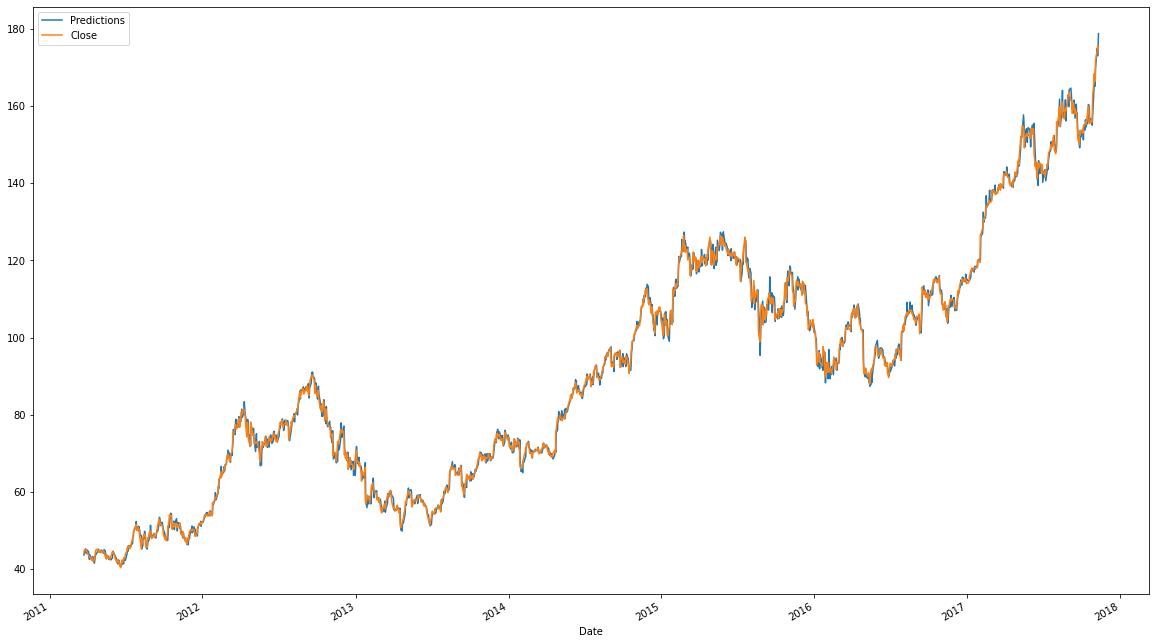

In [44]:
Plot_Predictions(AAPL_Model,stock['AAPL'],AAPL_train,AAPL_test)

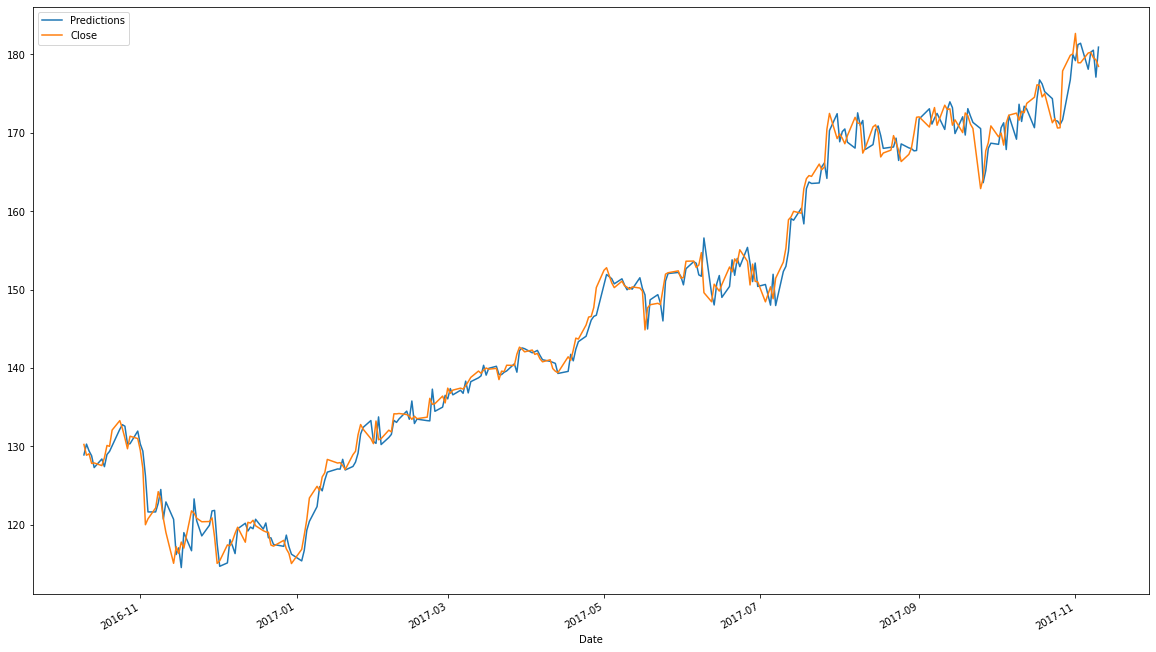

In [45]:
Plot_Predictions(FB_Model,stock['FB'],FB_train,FB_test)

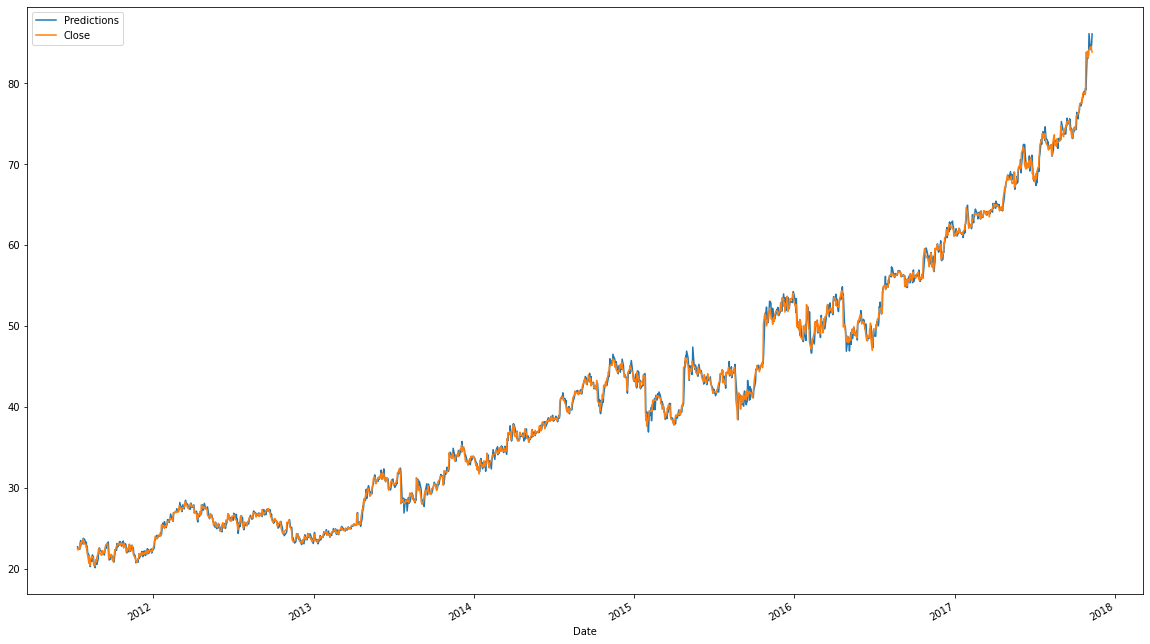

In [42]:
Plot_Predictions(MSFT_Model,stock['MSFT'],MSFT_train,MSFT_test)

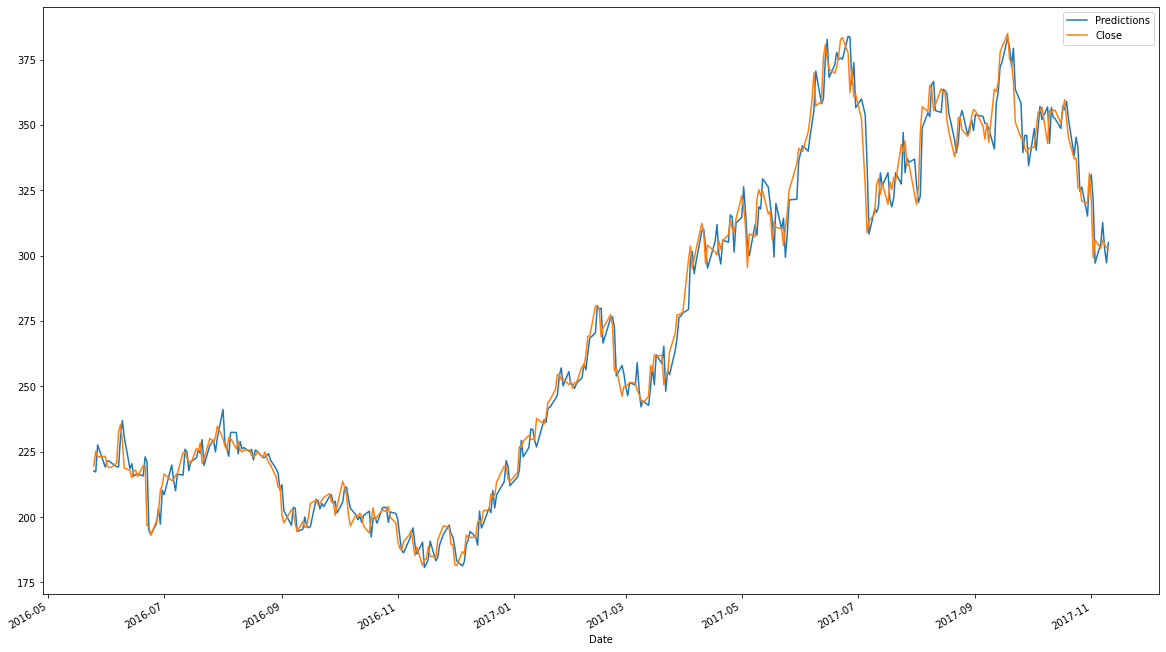

In [48]:
Plot_Predictions(TSLA_Model,stock['TSLA'],TSLA_train,TSLA_test)

In [18]:
#RMSE
def RMSE(model,train_data,test_data):
  start=len(train_data)
  end=len(train_data)+len(test_data)-1
  pred=model.predict(start=start,end=end,typ='levels')
  test_data.mean()
  rmse=sqrt(mean_squared_error(pred,test_data))
  return rmse

In [50]:
RMSE(AAPL_Model,AAPL_train,AAPL_test)

1.6026138169197601

In [51]:
RMSE(MSFT_Model,MSFT_train,MSFT_test)

0.6717729224650871

In [52]:
RMSE(FB_Model,FB_train,FB_test)

1.9224325920273218

In [53]:
RMSE(TSLA_Model,TSLA_train,TSLA_test)

6.856541533886884

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


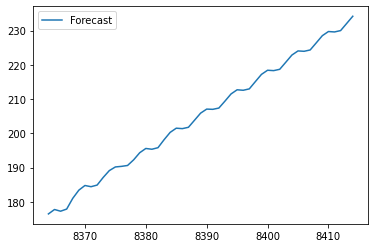

In [72]:

# Forecast for the next 3 years
#start_index = '2017-11-10'
#end_index = '2017-11-10'
#forecast = AAPL_Model.predict(start = len(stock['AAPL']), 
#                          end = len(stock['AAPL'])+50, 
#                         typ = 'levels').rename('Forecast')
  
# Plot the forecast values
#stock['AAPL'].plot(figsize = (12, 5), legend = True)
#forecast.plot(legend = True)